## First use the HPLC_molecule_creation script if it is the fist analysis load
load the molecules from the path

In [1]:
from chromatopy import ChromAnalyzer
import os
import json
from chromatopy import Molecule       
import matplotlib.pyplot as plt
import numpy as np
from pure_eval.utils import safe_name


# create list to add molecules to
molecules = []

# define path to the calibration molecules
molecule_path = "data/calib_molecules/"

# loop over all the files in the calibration molecules
for molecule_name in os.listdir("data/calib_molecules/"):
    full_path = os.path.join(molecule_path, molecule_name)

    # read the molecule data and reconstruct the molecule object
    with open(full_path, "r") as f:
        molecule_dict = json.load(f)

        # append the molecule to the list
        molecules.append(Molecule(**molecule_dict))


# If you have a negative control otherwise can skip to time samples 

In [2]:
timecourse_path = "Data/MjNK/Negative control"

# need to define the initial concentrations of the molecules
# therefore create a dictionary with the molecule ids as key and the initial concentration as value
init_conc = {
    "Ado": 5,
    "ADP": 0,
    "AMP": 0,
    "ATP": 5,
}

# read the timecourse data
analyzer = ChromAnalyzer.read_agilent(
    path=timecourse_path, ph=8, temperature=37, mode="timecourse"
)

# add the calibration molecules to the timecourse data
for molecule in molecules:
    analyzer.add_molecule(
        molecule=molecule,
        init_conc=init_conc[molecule.id],
    )

analyzer.visualize_all(assigned_only=True)

 Loaded 8 chromatograms.
🎯 Assigned Adenosine to 8 peaks
🎯 Assigned Adenosine-5'-diphosphate to 8 peaks
🎯 Assigned Adenosine Phosphate to 6 peaks
🎯 Assigned Adenosine Triphosphate to 8 peaks


KeyError: 'GDP'

In [ ]:
enzymeml_doc = analyzer.to_enzymeml(
    name="negative control",
)

In [ ]:
import matplotlib.pyplot as plt

for measurement in enzymeml_doc.measurements:
    for molecule in measurement.species_data:
        plt.scatter(molecule.time, molecule.data, label=molecule.species_id)
plt.xlabel("time [min]")
plt.ylabel("Concentration [mM]")
plt.legend()

## Timecourse data analysis 
First set up first the metadata for each reaktion



In [3]:

# add the enzymes
enzymes = {
    "name": "MjNK",
    "id": "AAB98396.1",
    "conc": "20",
    "unite": "mg/L",
}
# create the data list
analyzer_data = []
analyzer_data.append(
    {
        "path": "data/MjNK/Time sample/20241030 Ado ATP",
        "temperature": 310.15,
        "molecules": ["Ado", "AMP", "ADP", "ATP"],
        "enzymes": ["MjNK"],
        "pH": 8
    }
)
analyzer_data.append(
    {
        "path": "data/MjNK/Time sample/20241030 Gua ATP",
        "temperature": 310.15,
        "molecules": ["Gua", "GMP", "ADP", "ATP"],
        "enzymes": ["MjNK"],
        "pH": 8
    }
)
analyzer_data.append(
    {
        "path": "data/MjNK/Time sample/20241111 Ado ATP",
        "temperature": 310.15,
        "molecules": ["Ado", "AMP", "ADP", "ATP"],
        "enzymes": ["MjNK"],
        "pH": 8
    }
)
analyzer_data.append(
    {
        "path": "data/MjNK/Time sample/20241111 Ado GTP",
        "temperature": 310.15,
        "molecules": ["Ado", "AMP", "GDP", "GTP"],
        "enzymes": ["MjNK"],
        "pH": 8
    }
)
analyzer_data.append(
    {
        "path": "data/MjNK/Time sample/20241111 Ado Gua ATP",
        "temperature": 310.15,
        "molecules": ["Ado", "AMP", "ADP", "ATP", "Gua", "GMP"],
        "enzymes": ["MjNK"],
        "pH": 8
    }
)
analyzer_data.append(
    {
        "path": "data/MjNK/Time sample/20241111 Gua GTP",
        "temperature": 310.15,
        "molecules": ["Gua", "GMP", "GDP", "GTP"],
        "enzymes": ["MjNK"],
        "pH": 8
    }
)
# set up the starting conc
init_conc = {
    "Ado": 5,
    "ADP": 0,
    "AMP": 0,
    "ATP": 5,
    "Gua": 5,
    "GMP": 0,
    "GDP": 0,
    "GTP": 5,
}
# set up the colors for the grafs 
colors = {
    "Ado": "#a6cee3",
    "ADP": "#1f78b4",
    "AMP": "#b2df8a",
    "ATP": "#33a02c",
    "Gua": "#fb9a99",
    "GMP": "#e31a1c",
    "GDP": "#fdbf6f",
    "GTP": "#ff7f00",
    "cGAMP": "#cab2d6",
}

# Processing the timecours data 

 Loaded 8 chromatograms.
🎯 Assigned Adenosine to 8 peaks
🎯 Assigned Adenosine Phosphate to 8 peaks
🎯 Assigned Adenosine-5'-diphosphate to 8 peaks
🎯 Assigned Adenosine Triphosphate to 8 peaks
 Loaded 8 chromatograms.
🎯 Assigned Adenosine to 8 peaks
🎯 Assigned Adenosine Phosphate to 8 peaks
🎯 Assigned Adenosine-5'-diphosphate to 8 peaks
🎯 Assigned Adenosine Triphosphate to 8 peaks
 Loaded 8 chromatograms.
🎯 Assigned Adenosine to 8 peaks
🎯 Assigned Adenosine Phosphate to 8 peaks
🎯 Assigned Adenosine-5'-diphosphate to 8 peaks
🎯 Assigned Adenosine Triphosphate to 8 peaks


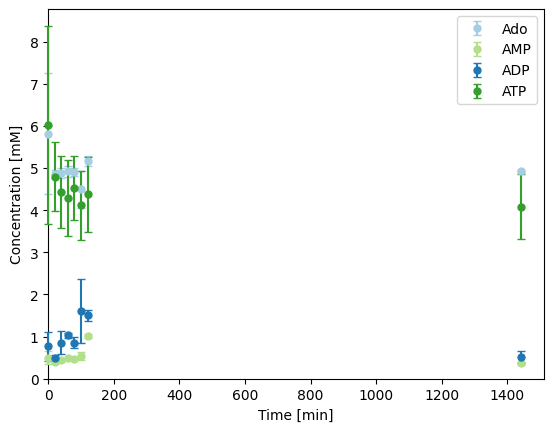

 Loaded 8 chromatograms.
🎯 Assigned Guanosine to 8 peaks
🎯 Assigned Guanosine Monophosphate to 8 peaks
🎯 Assigned Adenosine-5'-diphosphate to 8 peaks
🎯 Assigned Adenosine Triphosphate to 8 peaks
 Loaded 8 chromatograms.
🎯 Assigned Guanosine to 8 peaks
🎯 Assigned Guanosine Monophosphate to 8 peaks
🎯 Assigned Adenosine-5'-diphosphate to 8 peaks
🎯 Assigned Adenosine Triphosphate to 8 peaks
 Loaded 8 chromatograms.
🎯 Assigned Guanosine to 8 peaks
🎯 Assigned Guanosine Monophosphate to 8 peaks
🎯 Assigned Adenosine-5'-diphosphate to 8 peaks
🎯 Assigned Adenosine Triphosphate to 8 peaks


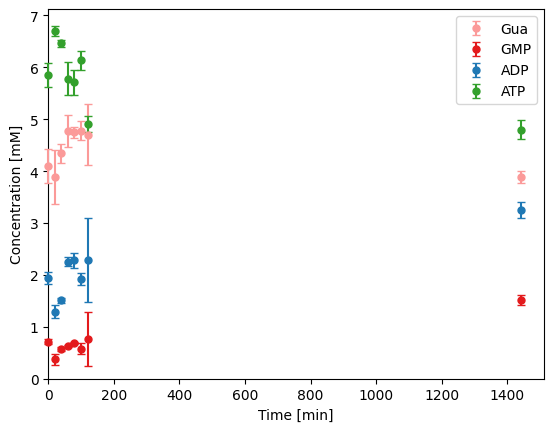

 Loaded 8 chromatograms.
🎯 Assigned Adenosine to 8 peaks
🎯 Assigned Adenosine Phosphate to 8 peaks
🎯 Assigned Adenosine-5'-diphosphate to 8 peaks
🎯 Assigned Adenosine Triphosphate to 8 peaks
 Loaded 8 chromatograms.
🎯 Assigned Adenosine to 8 peaks
🎯 Assigned Adenosine Phosphate to 8 peaks
🎯 Assigned Adenosine-5'-diphosphate to 8 peaks
🎯 Assigned Adenosine Triphosphate to 8 peaks
 Loaded 8 chromatograms.
🎯 Assigned Adenosine to 8 peaks
🎯 Assigned Adenosine Phosphate to 8 peaks
🎯 Assigned Adenosine-5'-diphosphate to 8 peaks
🎯 Assigned Adenosine Triphosphate to 8 peaks


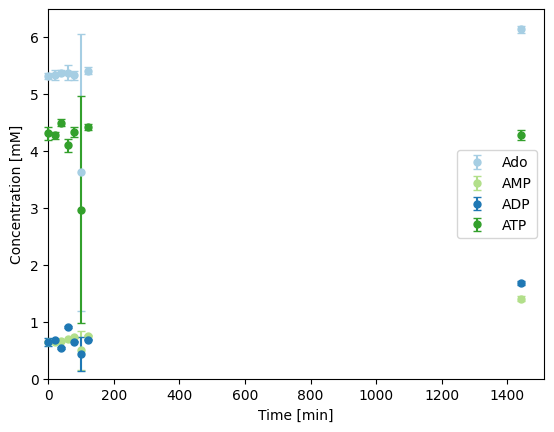

 Loaded 8 chromatograms.
🎯 Assigned Adenosine to 8 peaks
🎯 Assigned Adenosine Phosphate to 8 peaks
🎯 Assigned Guanosine Diphosphate to 8 peaks
🎯 Assigned Guanosine Triphosphate to 8 peaks
 Loaded 8 chromatograms.
🎯 Assigned Adenosine to 8 peaks
🎯 Assigned Adenosine Phosphate to 8 peaks
🎯 Assigned Guanosine Diphosphate to 8 peaks
🎯 Assigned Guanosine Triphosphate to 8 peaks
 Loaded 8 chromatograms.
🎯 Assigned Adenosine to 8 peaks
🎯 Assigned Adenosine Phosphate to 8 peaks
🎯 Assigned Guanosine Diphosphate to 8 peaks
🎯 Assigned Guanosine Triphosphate to 8 peaks


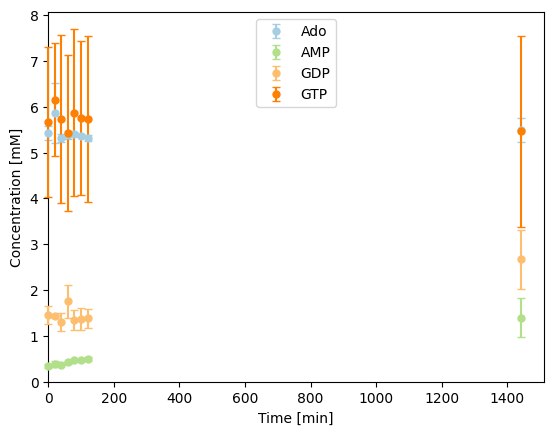

 Loaded 8 chromatograms.
🎯 Assigned Adenosine to 8 peaks
🎯 Assigned Adenosine Phosphate to 8 peaks
🎯 Assigned Adenosine-5'-diphosphate to 8 peaks
🎯 Assigned Adenosine Triphosphate to 8 peaks
🎯 Assigned Guanosine to 8 peaks
🎯 Assigned Guanosine Monophosphate to 8 peaks
 Loaded 8 chromatograms.
🎯 Assigned Adenosine to 8 peaks
🎯 Assigned Adenosine Phosphate to 8 peaks
🎯 Assigned Adenosine-5'-diphosphate to 8 peaks
🎯 Assigned Adenosine Triphosphate to 8 peaks
🎯 Assigned Guanosine to 8 peaks
🎯 Assigned Guanosine Monophosphate to 8 peaks
 Loaded 8 chromatograms.
🎯 Assigned Adenosine to 8 peaks
🎯 Assigned Adenosine Phosphate to 8 peaks
🎯 Assigned Adenosine-5'-diphosphate to 8 peaks
🎯 Assigned Adenosine Triphosphate to 8 peaks
🎯 Assigned Guanosine to 8 peaks
🎯 Assigned Guanosine Monophosphate to 8 peaks


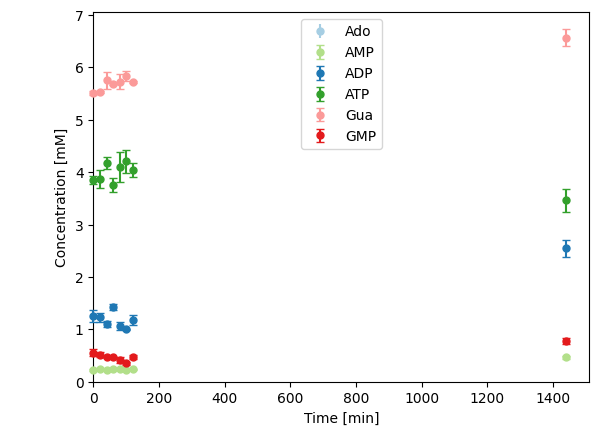

 Loaded 8 chromatograms.
🎯 Assigned Guanosine to 8 peaks
🎯 Assigned Guanosine Monophosphate to 8 peaks
🎯 Assigned Guanosine Diphosphate to 8 peaks
🎯 Assigned Guanosine Triphosphate to 8 peaks
 Loaded 8 chromatograms.
🎯 Assigned Guanosine to 8 peaks
🎯 Assigned Guanosine Monophosphate to 8 peaks
🎯 Assigned Guanosine Diphosphate to 8 peaks
🎯 Assigned Guanosine Triphosphate to 8 peaks
 Loaded 8 chromatograms.
🎯 Assigned Guanosine to 8 peaks
🎯 Assigned Guanosine Monophosphate to 8 peaks
🎯 Assigned Guanosine Diphosphate to 8 peaks
🎯 Assigned Guanosine Triphosphate to 8 peaks


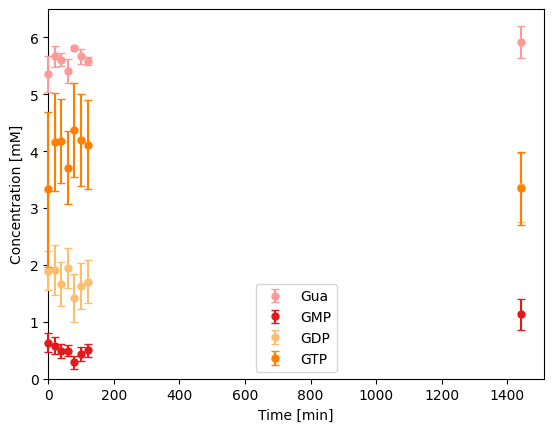

In [4]:
import pandas as pd

all_reps = []
filter_colors = {}
for data in analyzer_data:
    for data_path in os.listdir(data["path"]):
        path = os.path.join(data["path"], data_path)
        all_reps.append(path)
    for i, path in enumerate(all_reps):    
        analyzer = ChromAnalyzer.read_agilent(
         path=path, ph=data["pH"], temperature=data["temperature"], mode="timecourse"
        )
        # add the calibration molecules to the timecourse data
        for molecule_name in data["molecules"]:
            for molecule in molecules:
                if molecule_name == molecule.id :
                    analyzer.add_molecule(
                        molecule=molecule,init_conc=init_conc[molecule.id]
                    )
            for color in colors:
                if molecule_name == color:
                    filter_colors[molecule_name] = color
  #      for enzyme_name in data["enzymes"]:
   #         analyzer.proteins(
    #            NCBI_cid=4542,
     #           id=enzymes["name"],
      #          init_conc=enzymes['conc'],
       #         conc_unit=enzymes['unite'],
        #        retention_time=1
         #   )
    
        # in the first iteration, create the enzymeML document
        # concentration calculation is enabled by default
        if i == 0:
            timecourse_enzymeML = analyzer.to_enzymeml(name="timecourse data")
    
        # in the following iterations, add the data to the enzymeML document
        else:
            analyzer.add_to_enzymeml(timecourse_enzymeML)

        if i == 2: 
            # Define colors for each molecule

            # Plot mean as scatter points with error bars for standard deviation
            # Initialize a dictionary to store time and data values for each molecule across measurements
            molecule_data = {species_id: {"time": [], "data": []} for species_id in filter_colors.keys()}
            
            # Aggregate data for each molecule across all measurements
            for measurement in timecourse_enzymeML.measurements:
                for molecule in measurement.species_data:
                    molecule_data[molecule.species_id]["time"].append(molecule.time)
                    molecule_data[molecule.species_id]["data"].append(molecule.data)
            
            
            # Plot mean and standard deviation for each molecule
            for species_id, data_dict in molecule_data.items():
                # Convert lists of time and data to NumPy arrays for easier computation
                times = np.array(data_dict["time"])
                data_values = np.array(data_dict["data"])
            
                # Calculate mean and standard deviation along the measurements axis
                mean_time = np.mean(times, axis=0)
                mean_data = np.mean(data_values, axis=0)
                std_data = np.std(data_values, axis=0)
                
                
                        
                # Plot mean as scatter points with error bars for standard deviation
                color = colors[species_id]
                plt.errorbar(
                    mean_time,
                    mean_data,
                    yerr=std_data,
                    fmt="o",
                    color=color,
                    label=species_id,
                    ecolor=color,
                    capsize=3,
                    markersize=5,
                    alpha=1,
                    zorder=5,
                    clip_on=False
                )
            
            
            # Set y-axis to start at zero
            plt.ylim(bottom=0)
            plt.xlim(left=0)
            
            # Customize and show the legend
            handles, labels = plt.gca().get_legend_handles_labels()
            by_label = dict(zip(labels, handles))
            plt.xlabel("Time [min]")
            plt.ylabel("Concentration [mM]")
            plt.legend(by_label.values(), by_label.keys())
            picture_safe = data["path"].split("/")[-1]
            plt.savefig('data/MjNK/results/'+picture_safe+'.png')
            plt.show()
            # save the enzymeML document to file
    
            with open("data/MjNK/results/"+picture_safe+"_enzymeML.json", "w") as f:
                f.write(timecourse_enzymeML.model_dump_json())
            with pd.ExcelWriter("data/MjNK/results/"+picture_safe+".xlsx", engine='xlsxwriter') as writer:
            # Iterate over each species in the molecule_data dictionary
                for species_id, data in molecule_data.items():
                    # Create a DataFrame for the current species
                    df = pd.DataFrame(data)
                    # Write the DataFrame to a specific sheet named after the species_id
                    df.to_excel(writer, sheet_name=species_id, index=False)
    filter_colors.clear()
    all_reps.clear()

## Get means and standard deviations among measurements with identical initial conditions